# Dos deltas dentro de pozo cuadrado

> $\mathbb{R} i \vec c \hbar$

In [1]:
from pylab import *
from scipy.special import *
from scipy.optimize import *

In [2]:
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"]})

Ecuaciones que involucran las condiciones a la frontera:

$$
{\rm sn} \left( \alpha_1 \xi (1 +\varphi_1)\right) = \sqrt{m_1} \;\;\;\;\; \textrm{for } \;\;\; x=-R
$$

$$
{\rm sn} \left( \alpha_3 \xi (1 -\varphi_3)\right) = \sqrt{m_3} \;\;\;\;\; \textrm{for } \;\;\; x=R
$$

$$
\alpha _i \sqrt{m_i} {\rm cd}\left( \alpha_i \xi ( \chi_i - \varphi_i) \right) =
\alpha _{i+1} \sqrt{m_{i+1}} {\rm cd}\left( \alpha_{i+1} \xi ( \chi_i - \varphi_{i+1}) \right)
$$

$$
\alpha_i ^2 \sqrt{m_i}(1-m_i)  \frac{{\rm sn}\left( \alpha_i \xi ( \chi_i - \varphi_i) \right)}{{\rm dn}^2\left( \alpha_i \xi (\chi_i - \varphi_i) \right)} - 
\alpha_{i+1} ^2 \sqrt{m_{i+1}}(1-m_{i+1})  \frac{{\rm sn}\left( \alpha_{i+1} \xi ( \chi_i - \varphi_{i+1}) \right)}{{\rm dn}^2\left( \alpha_{i+1} \xi (\chi_i - \varphi_{i+1}) \right)} = 
\tilde \beta \alpha_{i+1} \sqrt{m_{i+1}}  {\rm cd}\left( \alpha_{i+1} \xi ( \chi_i - \varphi_{i+1}) \right) \nonumber
$$


donde $\xi = \sqrt{V_0}R$, los parámetros adimensionales de distancia son  $\chi_i=\frac{x_i}{R}$ y $\varphi _i = \frac{a_i}{R}$, y la intensidad del potencial delta se reescribe como $\tilde \beta = \beta \sqrt{\frac{2}{V_0}}$.

In [3]:
def ecs(pto_ini,param):
    # variables
    m1, m2, m3, vfi1, vfi2, vfi3 = pto_ini
    # parametros
    xi, chi1, chi2, beta = param
    # factores que multiplican funciones
    alfa1, alfa2, alfa3 = sqrt(2/(1+m1)), sqrt(2/(1+m2)), sqrt(2/(1+m3))
    sqm1m1, sqm2m2, sqm3m3 = sqrt(m1/(1+m1)), sqrt(m2/(1+m2)), sqrt(m3/(1+m3))
    # argumentos de funciones
    argm1, argm3 = alfa1*xi*(1+vfi1), alfa3*xi*(1-vfi3)
    argm1chi1, argm2chi1 = alfa1*xi*(chi1-vfi1), alfa2*xi*(chi1-vfi2)
    argm2chi2, argm3chi2 = alfa2*xi*(chi2-vfi2), alfa3*xi*(chi2-vfi3)
    # ecuaciones
    ec1 = ellipj(argm1,m1)[0] - sqrt(m1)
    ec2 = ellipj(argm3,m3)[0] - sqrt(m3)
    #
    scdm1chi1vfi1, scdm2chi1vfi2 = ellipj(argm1chi1,m1), ellipj(argm2chi1,m2)
    ec3 = sqm1m1*(scdm1chi1vfi1[1]/scdm1chi1vfi1[2]) - sqm2m2*(scdm2chi1vfi2[1]/scdm2chi1vfi2[2])
    #
    pre_ec4_1 = sqrt(m1)*((1-m1)/(1+m1))*(scdm1chi1vfi1[0]/(scdm1chi1vfi1[2]**2))
    pre_ec4_2 = sqrt(m2)*((1-m2)/(1+m2))*(scdm2chi1vfi2[0]/(scdm2chi1vfi2[2]**2))
    ec4 =  pre_ec4_1 - pre_ec4_2 - beta*(sqm2m2*(scdm2chi1vfi2[1]/scdm2chi1vfi2[2]))
    #
    scdm2chi2vfi2, scdm3chi2vfi3 = ellipj(argm2chi2,m2), ellipj(argm3chi2,m3)
    ec5 = sqm2m2*(scdm2chi2vfi2[1]/scdm2chi2vfi2[2]) - sqm3m3*(scdm3chi2vfi3[1]/scdm3chi2vfi3[2])
    #
    pre_ec6_1 = sqrt(m2)*((1-m2)/(1+m2))*(scdm2chi2vfi2[0]/(scdm2chi2vfi2[2]**2))
    pre_ec6_2 = sqrt(m3)*((1-m3)/(1+m3))*(scdm3chi2vfi3[0]/(scdm3chi2vfi3[2]**2))
    ec6 =  pre_ec6_1 - pre_ec6_2 - beta*(sqm3m3*(scdm3chi2vfi3[1]/scdm3chi2vfi3[2]))    
    return (ec1, ec2, ec3, ec4, ec5, ec6)

xi_chis_beta = [1.,-0.1,0.1,0.]
ms_vfis_sol =  fsolve(ecs, (0.1,0.1,0.1,0.,0.,0.),args=(xi_chis_beta))

print(ms_vfis_sol)
print( ecs(ms_vfis_sol,xi_chis_beta) )

[6.84428217e-01 6.84428217e-01 6.84428217e-01 4.07395943e-17
 2.42468088e-17 3.05493240e-17]
(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)


In [4]:
def g_2V0_2deltas(ms_vfis,param):
    m1, m2, m3, vfi1, vfi2, vfi3 = ms_vfis
    xi, chi1, chi2 = param
    alfa1, alfa2, alfa3 = sqrt(2/(1+m1)), sqrt(2/(1+m2)), sqrt(2/(1+m3))
    #
    argchi1vfi1, argchi1vfi2 = alfa1*xi*(chi1-vfi1), alfa2*xi*(chi1-vfi2)
    argchi2vfi2, argchi2vfi3 = alfa2*xi*(chi2-vfi2), alfa3*xi*(chi2-vfi3)
    #
    arg1_vfi1, arg1_vfi3 = alfa1*xi*(1+vfi1), alfa3*xi*(1-vfi3)
    #
    scd_argchi1vfi1, scd_argchi1vfi2 = ellipj( ellipk(m1)-argchi1vfi1 , m1)[3], ellipj( ellipk(m2)-argchi1vfi2 ,m2)[3]
    scd_argchi2vfi2, scd_argchi2vfi3 = ellipj( ellipk(m2)-argchi2vfi2 , m1)[3], ellipj( ellipk(m3)-argchi2vfi3 ,m2)[3]
    #
    scd_arg1_vfi1, scd_arg1_vfi3 = ellipj(arg1_vfi1,m1)[3], ellipj(arg1_vfi3,m3)[3]
    #
    val_g = xi*( ((1+chi1)/(1+m1)) + ((chi2-chi1)/(1+m2)) + ((1-chi2)/(1+m3)) )
    val_g += sqrt(m1/2) + sqrt(m3/2)
    #
    val_g += -0.5*alfa1*( ellipe( m1 ) + ellipeinc(scd_arg1_vfi1,m1) )
    val_g += 0.5*alfa3*( ellipe( m3 ) - ellipeinc(scd_arg1_vfi3,m3) )
    #
    val_g += 0.5*alfa1*ellipeinc(scd_argchi1vfi1,m1)
    val_g += -0.5*alfa2*ellipeinc(scd_argchi1vfi2,m2)
    #
    val_g += 0.5*alfa2*ellipeinc(scd_argchi2vfi2,m2)
    val_g += -0.5*alfa3*ellipeinc(scd_argchi2vfi3,m3)
    return val_g

In [5]:
xi_chis_beta = [.04,-0.5,0.5,0.]
ms_vfis_sol =  fsolve(ecs, (0.01,0.01,0.01,0.,0.,0.),args=(xi_chis_beta))
print("m_s y phi_s = ",ms_vfis_sol)
g = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
print("g=",g)

m_s y phi_s =  [3.18643478e-03 3.18643478e-03 3.18643478e-03 4.96174840e-17
 6.11416027e-17 5.30144488e-17]
g= 0.07983052463761964


/Users/rich/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


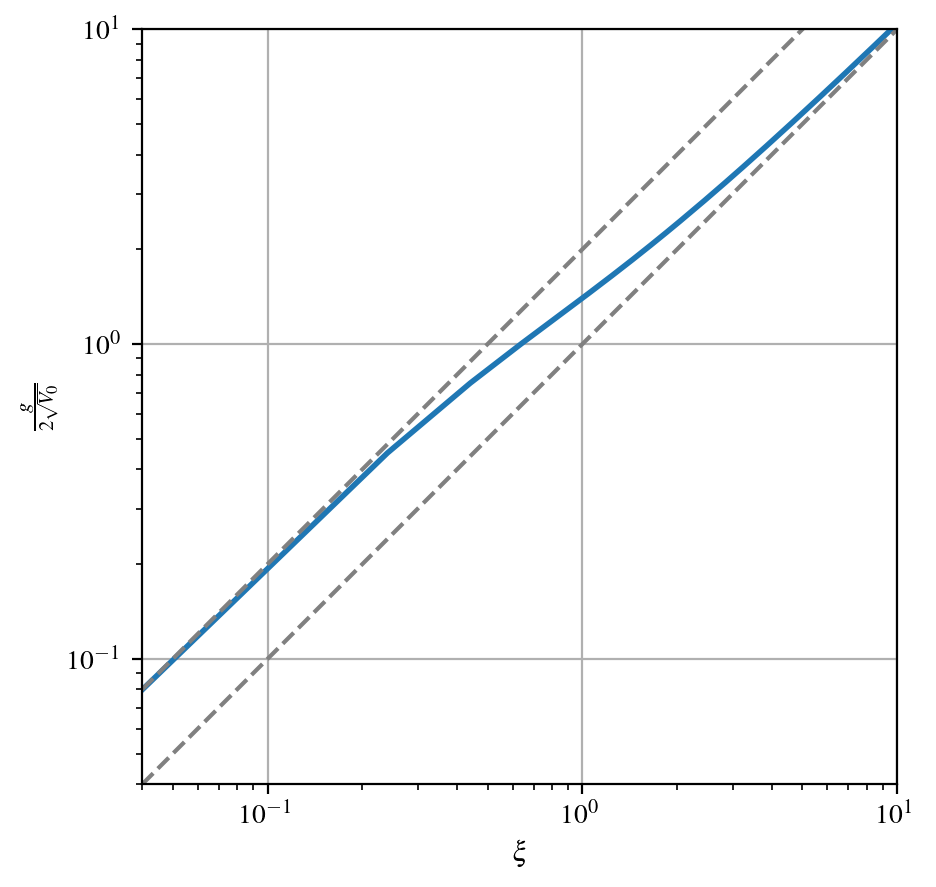

In [6]:
fig = figure(dpi=200,figsize=(7,5))
xi_vec = linspace(0.04,100,500)
g_vec_0_0 = np.zeros(len(xi_vec))
# primer calculo
chi1,chi2,beta = -0.5,0.5,0.
xi_chis_beta = [xi_vec[0],chi1,chi2,beta]
ms_vfis_sol =  fsolve(ecs, (0.01,0.01,0.01,0.,0.,0.),args=(xi_chis_beta))
g_vec_0_0[0] = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
# ciclo 
for i in range(1,len(xi_vec)):
    xi_chis_beta = [xi_vec[i],chi1,chi2,beta]
    ms_vfis_sol =  fsolve(ecs, ms_vfis_sol,args=(xi_chis_beta))
    g_vec_0_0[i] = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
    
loglog(xi_vec,g_vec_0_0,lw=2)
loglog(xi_vec,xi_vec,'--',color="gray")
loglog(xi_vec,2*xi_vec,'--',color="gray")
xlabel(r'$\xi$'),ylabel(r'$\frac{g}{2\sqrt{V_0}}$')
xlim([0.04,10]),ylim([0.04,10]),grid()
gca().set_aspect("equal")
show()

In [7]:
xi_chis_beta = [.12,-0.5,0.5,0.1*sqrt(2)]
ms_vfis_sol =  fsolve(ecs, (0.01,0.01,0.01,0.,0.,0.),args=(xi_chis_beta))
print("m_s y phi_s = ",ms_vfis_sol)
g = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
print("g=",g)

m_s y phi_s =  [ 8.01247891e-04  8.04465659e-04  8.01247891e-04 -8.33114277e-01
  2.04444954e-10  8.33114277e-01]
g= 0.040193114020002474


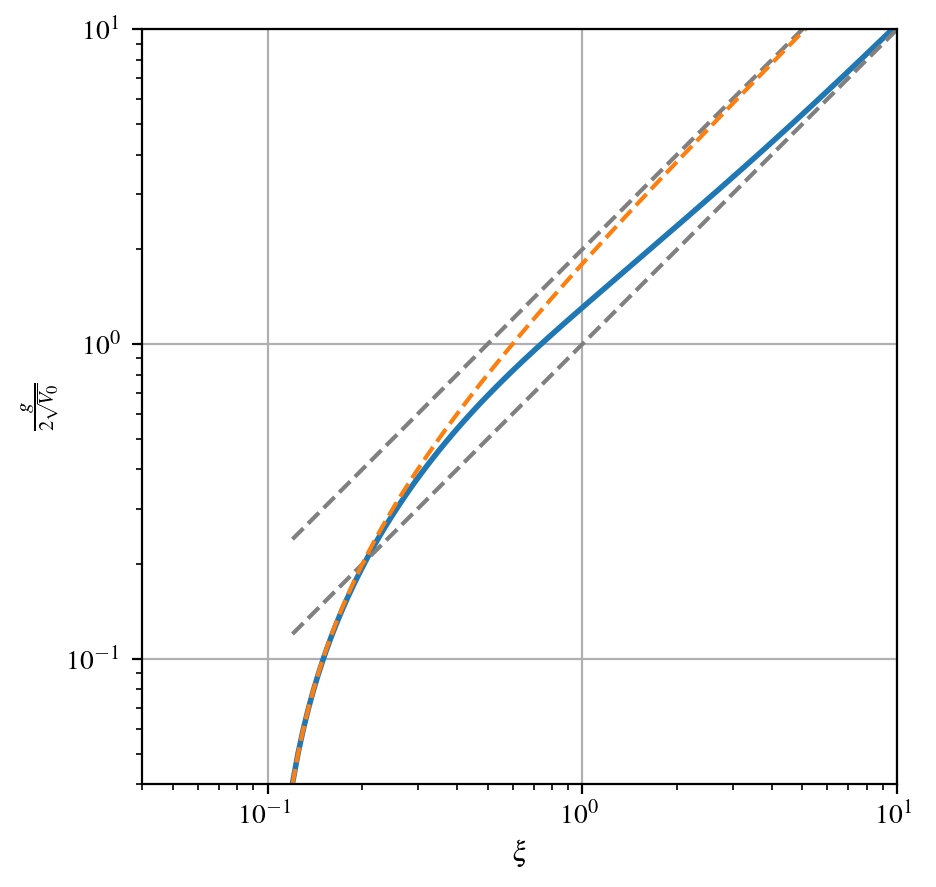

In [8]:
fig = figure(dpi=200,figsize=(7,5))
xi_vec = linspace(0.12,10,2000)
g_vec_05_01 = np.zeros(len(xi_vec))
# primer calculo
chi1,chi2,beta = -0.5,0.5,0.1*sqrt(2)
xi_chis_beta = [xi_vec[0],chi1,chi2,beta]
ms_vfis_sol =  fsolve(ecs, (0.01,0.01,0.01,0.,0.,0.),args=(xi_chis_beta))
g_vec_05_01[0] = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
# ciclo 
for i in range(1,len(xi_vec)):
    xi_chis_beta = [xi_vec[i],chi1,chi2,beta]
    ms_vfis_sol =  fsolve(ecs, ms_vfis_sol,args=(xi_chis_beta))
    g_vec_05_01[i] = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
    
loglog(xi_vec,g_vec_05_01,lw=2)
loglog(xi_vec,xi_vec,'--',color="gray")
loglog(xi_vec,2*xi_vec,'--',color="gray")

loglog(xi_vec,2*xi_vec-0.2,"--")

xlabel(r'$\xi$'),ylabel(r'$\frac{g}{2\sqrt{V_0}}$')
xlim([0.04,10]),ylim([0.04,10]),grid()
gca().set_aspect("equal")
show()

In [9]:
xi_chis_beta = [.254,-0.5,0.5,0.25*sqrt(2)]
ms_vfis_sol =  fsolve(ecs, (0.01,0.01,0.01,-0.01,-0.01,0.01),args=(xi_chis_beta))
print("m_s y phi_s = ",ms_vfis_sol)
g = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
print("g=",g)

m_s y phi_s =  [ 8.50219824e-05  8.52996423e-05  8.50219824e-05 -9.74329075e-01
  3.08376440e-14  9.74329075e-01]
g= 0.013081964912538435


<ipython-input-3-e927ae46997d>:8: RuntimeWarning: invalid value encountered in sqrt
  sqm1m1, sqm2m2, sqm3m3 = sqrt(m1/(1+m1)), sqrt(m2/(1+m2)), sqrt(m3/(1+m3))
<ipython-input-3-e927ae46997d>:14: RuntimeWarning: invalid value encountered in sqrt
  ec1 = ellipj(argm1,m1)[0] - sqrt(m1)
<ipython-input-3-e927ae46997d>:15: RuntimeWarning: invalid value encountered in sqrt
  ec2 = ellipj(argm3,m3)[0] - sqrt(m3)
<ipython-input-3-e927ae46997d>:20: RuntimeWarning: invalid value encountered in sqrt
  pre_ec4_1 = sqrt(m1)*((1-m1)/(1+m1))*(scdm1chi1vfi1[0]/(scdm1chi1vfi1[2]**2))
<ipython-input-3-e927ae46997d>:21: RuntimeWarning: invalid value encountered in sqrt
  pre_ec4_2 = sqrt(m2)*((1-m2)/(1+m2))*(scdm2chi1vfi2[0]/(scdm2chi1vfi2[2]**2))
<ipython-input-3-e927ae46997d>:27: RuntimeWarning: invalid value encountered in sqrt
  pre_ec6_1 = sqrt(m2)*((1-m2)/(1+m2))*(scdm2chi2vfi2[0]/(scdm2chi2vfi2[2]**2))
<ipython-input-3-e927ae46997d>:28: RuntimeWarning: invalid value encountered in sqrt
  pre_ec6_2

<ipython-input-3-e927ae46997d>:8: RuntimeWarning: invalid value encountered in sqrt
  sqm1m1, sqm2m2, sqm3m3 = sqrt(m1/(1+m1)), sqrt(m2/(1+m2)), sqrt(m3/(1+m3))
<ipython-input-3-e927ae46997d>:14: RuntimeWarning: invalid value encountered in sqrt
  ec1 = ellipj(argm1,m1)[0] - sqrt(m1)
<ipython-input-3-e927ae46997d>:15: RuntimeWarning: invalid value encountered in sqrt
  ec2 = ellipj(argm3,m3)[0] - sqrt(m3)
<ipython-input-3-e927ae46997d>:20: RuntimeWarning: invalid value encountered in sqrt
  pre_ec4_1 = sqrt(m1)*((1-m1)/(1+m1))*(scdm1chi1vfi1[0]/(scdm1chi1vfi1[2]**2))
<ipython-input-3-e927ae46997d>:21: RuntimeWarning: invalid value encountered in sqrt
  pre_ec4_2 = sqrt(m2)*((1-m2)/(1+m2))*(scdm2chi1vfi2[0]/(scdm2chi1vfi2[2]**2))
<ipython-input-3-e927ae46997d>:27: RuntimeWarning: invalid value encountered in sqrt
  pre_ec6_1 = sqrt(m2)*((1-m2)/(1+m2))*(scdm2chi2vfi2[0]/(scdm2chi2vfi2[2]**2))
<ipython-input-3-e927ae46997d>:28: RuntimeWarning: invalid value encountered in sqrt
  pre_ec6_2

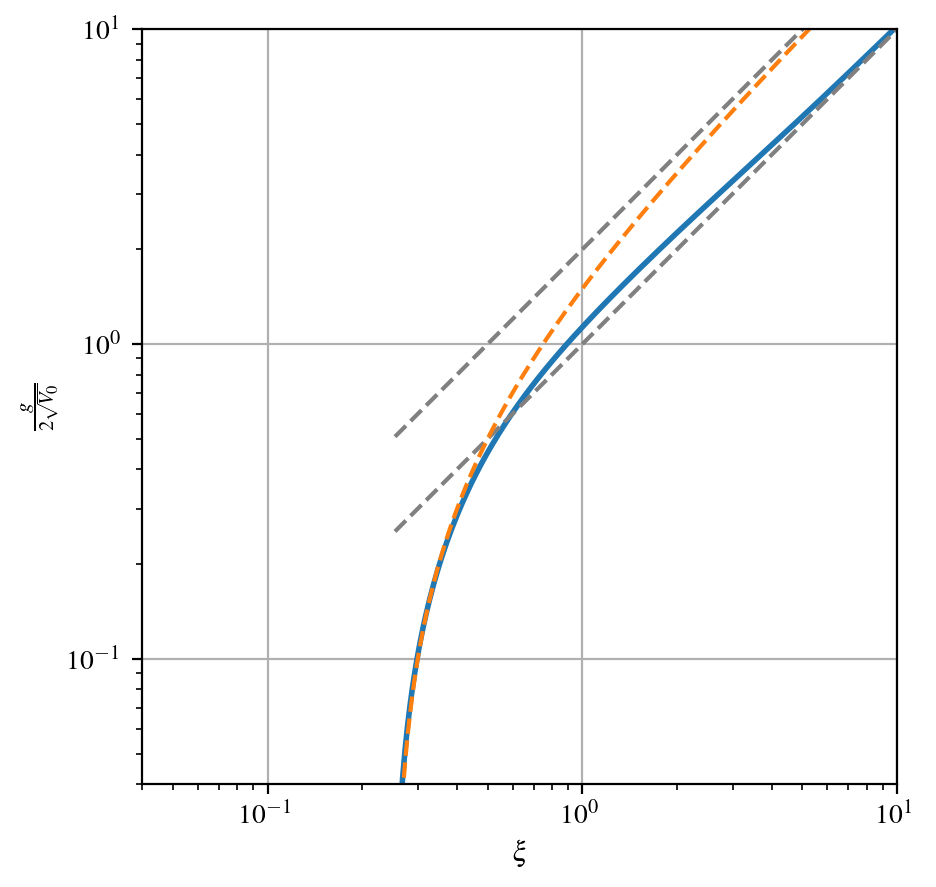

In [10]:
fig = figure(dpi=200,figsize=(7,5))
xi_vec = linspace(0.254,10,2000)
g_vec_05_025 = np.zeros(len(xi_vec))
# primer calculo
chi1,chi2,beta = -0.5,0.5,0.25*sqrt(2)
xi_chis_beta = [xi_vec[0],chi1,chi2,beta]
ms_vfis_sol =  fsolve(ecs, (0.01,0.01,0.01,-0.01,-0.01,0.01),args=(xi_chis_beta))
g_vec_05_025[0] = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
# ciclo 
for i in range(1,len(xi_vec)):
    xi_chis_beta = [xi_vec[i],chi1,chi2,beta]
    ms_vfis_sol =  fsolve(ecs, ms_vfis_sol,args=(xi_chis_beta))
    g_vec_05_025[i] = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
    
loglog(xi_vec,g_vec_05_025,lw=2)
loglog(xi_vec,xi_vec,'--',color="gray")
loglog(xi_vec,2*xi_vec,'--',color="gray")

loglog(xi_vec,2*xi_vec-0.5,"--")

xlabel(r'$\xi$'),ylabel(r'$\frac{g}{2\sqrt{V_0}}$')
xlim([0.04,10]),ylim([0.04,10]),grid()
gca().set_aspect("equal")
show()

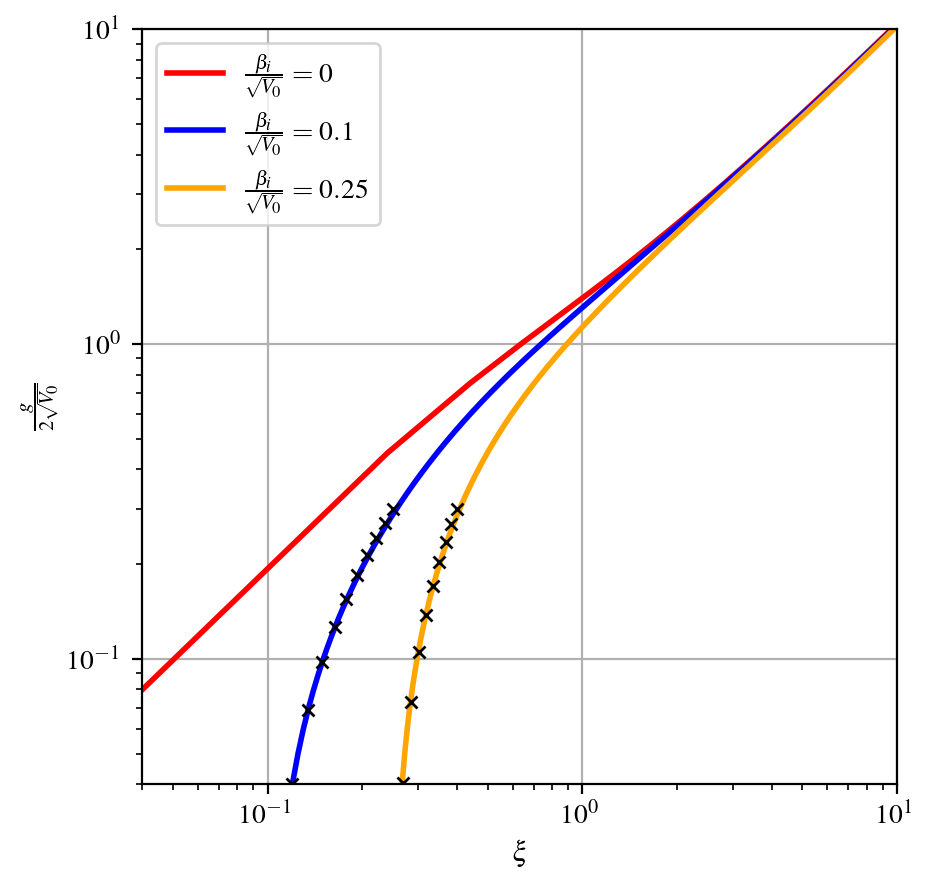

In [11]:
fig = figure(dpi=200,figsize=(7,5))

loglog(linspace(0.04,100,500),g_vec_0_0,lw=2,label=r"$\frac{\beta_i}{\sqrt{V_0}} = 0$",color="red")
loglog(linspace(0.12,10,2000),g_vec_05_01,lw=2,label=r"$\frac{\beta_i}{\sqrt{V_0}} = 0.1$",color="blue")
loglog(linspace(0.254,10,2000),g_vec_05_025,lw=2,label=r"$\frac{\beta_i}{\sqrt{V_0}} = 0.25$",color="orange")

mi_x_01 = linspace(0.12,0.25,10)
loglog(mi_x_01,2*mi_x_01-0.2,"x",lw=1,color="k",markersize=4)
mi_x_025 = linspace(0.254,.4,10)
loglog(mi_x_025,2*mi_x_025-0.5,"x",lw=1,color="k",markersize=4)

xlabel(r'$\xi$'),ylabel(r'$\frac{g}{2\sqrt{V_0}}$')
xlim([0.04,10]),ylim([0.04,10]),grid(),legend()
gca().set_aspect("equal")
#savefig("g_2delta.jpg",format="jpg",dpi=300,pad_inches=0,optimize=95)

datos = column_stack((linspace(0.12,10,2000),g_vec_05_01))
savetxt("g2d_01.dat",datos)
datos = column_stack((linspace(0.254,10,2000),g_vec_05_025))
savetxt("g2d_025.dat",datos)

datos =  column_stack(( mi_x_01,2*mi_x_01-0.2 , mi_x_025,2*mi_x_025-0.5 ))
savetxt("g2d_approx.dat",datos)

show()

### Funciones de onda

$$
\phi _0 (x) = \frac{1}{a_0 -\sqrt{g}x} \;\;\;\;\; \textrm{for}\;\;\;  \frac{x}{R}\leq -1
$$

$$
\phi _5 (x) = \frac{1}{a_5 +\sqrt{g}x} \;\;\;\;\; \textrm{for}\;\;\;  \frac{x}{R} \geq 1
$$

$$
\phi _i (x) = \sqrt{ \frac{2m_i V_0}{(1+m_i)g} } {\rm sn}\left( \sqrt{ \frac{2m_i }{1+m_i)} } \xi(\chi-\varphi_i)  +K(m_i) \right)\;\;\;\;\; \textrm{for}\;\;\;  i=1,2,3
$$

In [12]:
def psi_izq(x,a0,g):
    wave_func = 1./(a0-sqrt(g)*x)
    return wave_func

def psi_der(x,aNp2,g):
    wave_func = 1./(aNp2+sqrt(g)*x)
    return wave_func

def psi_i(chi,xi,vfi,m,g):
    alfa = sqrt(2./(1+m))
    wave_func = sqrt((2.*m)/(g*(1+m)))*ellipj(alfa*xi*(chi-vfi) + ellipk(m),m)[0]
    return wave_func

def a0_aNp2(m,xi,vfi,g):
    # a0
    alfa = sqrt(2./(1+m[0]))
    func_front = sqrt((2.*m[0])/(g*(1+m[0])))*ellipj(alfa*xi*(-1-vfi[0]) + ellipk(m[0]),m[0])[0]
    a0 = -sqrt(g)+(1/func_front)
    # aNp2
    alfa = sqrt(2./(1+m[1]))
    func_front = sqrt((2.*m[1])/(g*(1+m[1])))*ellipj(alfa*xi*(1-vfi[1]) + ellipk(m[1]),m[1])[0]
    aNp2 = -sqrt(g)+(1/func_front)
    return a0,aNp2

def psi_completa_1delta(chi,xi,chis,a_vfi,ms,g):
    wave_func = np.zeros(len(chi))
    for i in range(len(chi)):
        if chi[i] <= -1:
            wave_func[i] = psi_izq(chi[i],a_vfi[0],g) 
        elif -1 < chi[i] <= chis[0]:
            wave_func[i] = psi_i(chi[i],xi,a_vfi[1],ms[0],g)
        elif chis[0] < chi[i] <= chis[1]:
            wave_func[i] = psi_i(chi[i],xi,a_vfi[2],ms[1],g)            
        elif chis[1] < chi[i] <= 1:
            wave_func[i] = psi_i(chi[i],xi,a_vfi[3],ms[2],g)
        else:
            wave_func[i] = psi_der(chi[i],a_vfi[4],g) 
    return wave_func


def eval_Psi(chi,xi_chis_beta,p_ini=[0.01,0.01,0.01,0.,0.,0.]):
    ms_vfis_sol =  fsolve(ecs, p_ini,args=(xi_chis_beta))
    print("m_s y phi_s = ",ms_vfis_sol)
    g = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
    print("g=",g)
    ms = ms_vfis_sol[0:3]
    #print("sol: ",ms_vfis_sol)
    a_vfi = np.zeros(5)
    #print("Entrada: ",[ms[0],ms[-1]],xi_chis_beta[0],[ms_vfis_sol[3],ms_vfis_sol[-1]],g)
    a_vfi[0],a_vfi[-1] = a0_aNp2([ms[0],ms[-1]],xi_chis_beta[0],[ms_vfis_sol[3],ms_vfis_sol[-1]],g)
    #print(a_vfi[0],a_vfi[-1])
    a_vfi[1:4] = ms_vfis_sol[3:6]
    #print(a_vfi)
    Psi = psi_completa_1delta(chi,xi_chis_beta[0],xi_chis_beta[1:3],a_vfi,ms,g)
    return Psi

m_s y phi_s =  [ 4.96806350e-01  4.84165811e-01  4.96806350e-01 -2.88851378e-01
  9.26766774e-13  2.88851378e-01]
g= 1.2678801331354461
[ 5.64813384e-01 -2.88851378e-01  9.26766774e-13  2.88851378e-01
  5.64813384e-01]


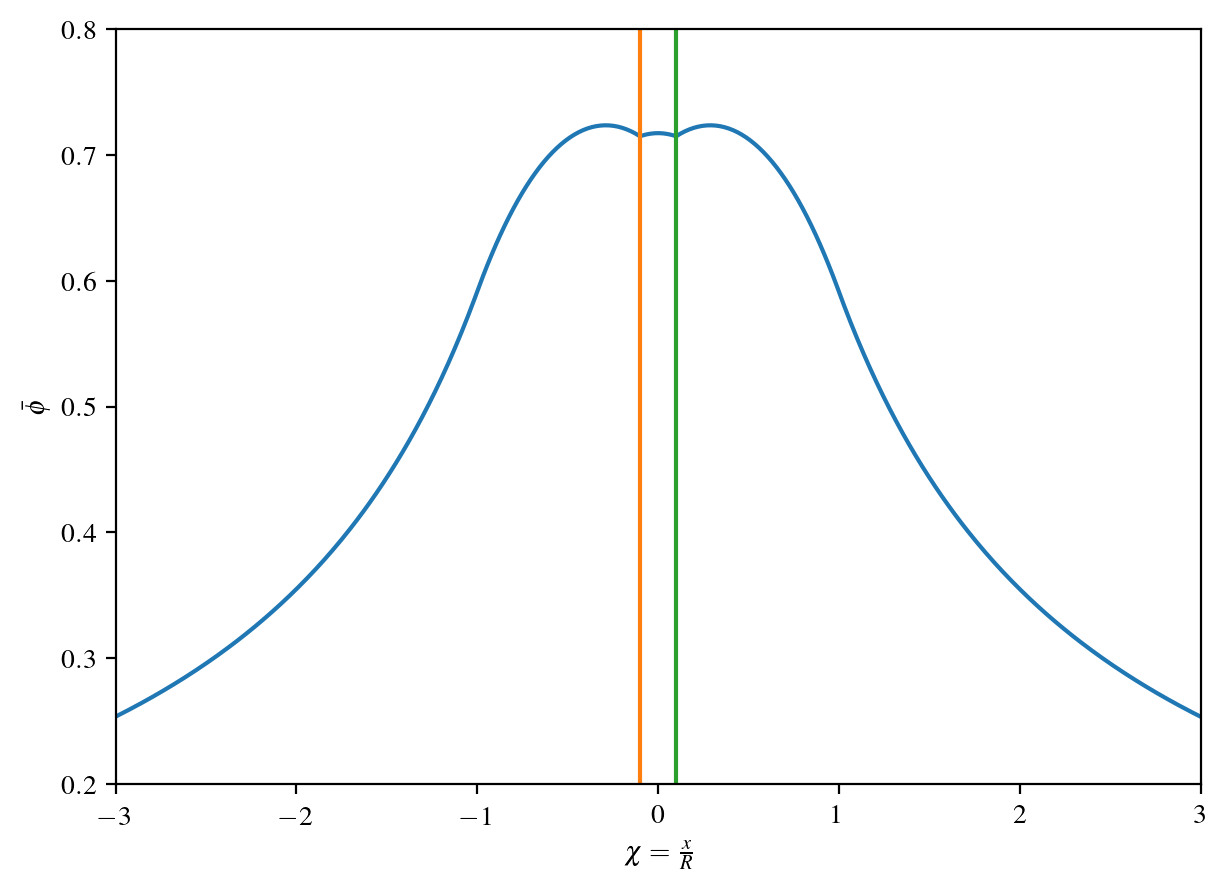

In [13]:
chi = linspace(-3,3,500)

fig = figure(dpi=200,figsize=(7,5))

xi_chis_beta = [1,-0.1,0.1,0.1*sqrt(2)]
pini = (0.01,0.01,0.01,0.,0.,0.)
ms_vfis_sol =  fsolve(ecs, pini,args=(xi_chis_beta))
print("m_s y phi_s = ",ms_vfis_sol)
g = g_2V0_2deltas(ms_vfis_sol,xi_chis_beta[0:3])
print("g=",g)
ms = ms_vfis_sol[0:3]
a_vfi = np.zeros(5)
a_vfi[0],a_vfi[-1] = a0_aNp2([ms[0],ms[-1]],xi_chis_beta[0],[ms_vfis_sol[3],ms_vfis_sol[-1]],g)
a_vfi[1:4] = ms_vfis_sol[3:6]
print(a_vfi)
Psi = psi_completa_1delta(chi,xi_chis_beta[0],xi_chis_beta[1:3],a_vfi,ms,g)
plot(chi,Psi)
plot(2*[xi_chis_beta[1]],[0,1])
plot(2*[xi_chis_beta[2]],[0,1])
xlabel(r"$\chi=\frac{x}{R}$"),ylabel(r"$\bar \phi$")
xlim([-3,3]),ylim([0.2,.8])
show()

m_s y phi_s =  [ 4.88339888e-01  5.17696814e-01  4.88339888e-01 -2.99914703e-01
 -2.26845878e-11  2.99914703e-01]
g= 1.2861973897438868
m_s y phi_s =  [ 4.65050173e-01  5.65642252e-01  4.65050173e-01 -3.29777045e-01
 -8.94911419e-11  3.29777045e-01]
g= 1.3062596114148173
m_s y phi_s =  [ 4.35855200e-01  6.02974341e-01  4.35855200e-01 -3.66155250e-01
 -6.31388244e-11  3.66155250e-01]
g= 1.3169310480728071


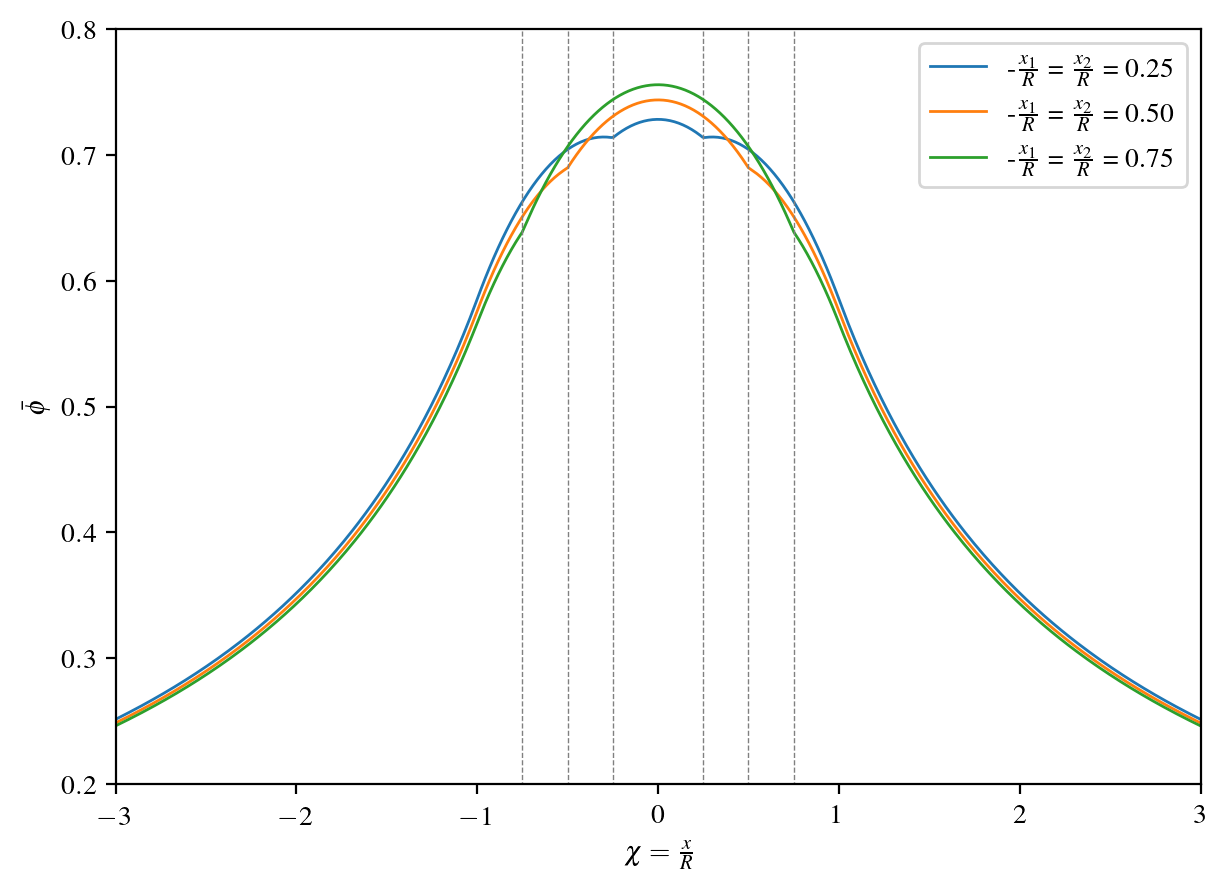

In [14]:
fig = figure(dpi=200,figsize=(7,5))
chi = linspace(-3,3,500)
chis = [.25,.5,0.75]
dat_waves,i = np.zeros((len(chi),len(chis))) ,0
for chi1 in chis:
    xi_chis_beta = [1,-chi1,chi1,0.1*sqrt(2)]
    Psi = eval_Psi(chi,xi_chis_beta)
    dat_waves[:,i] = Psi
    plot(chi,Psi,lw=1,label=r"-$\frac{x_1}{R}$ = $\frac{x_2}{R}$ = %2.2f" %chi1)
    plot(2*[xi_chis_beta[1]],[0,1],'--',lw=0.5,color="gray")
    plot(2*[xi_chis_beta[2]],[0,1],'--',lw=0.5,color="gray")
    i += 1
xlabel(r"$\chi=\frac{x}{R}$"),ylabel(r"$\bar \phi$")
xlim([-3,3]),ylim([0.2,.8]),legend()
#savefig("wave_2delta_b0-1.jpg",format="jpg",dpi=300,pad_inches=0,optimize=95)

datos = column_stack((chi,dat_waves))
savetxt("w2d_01.dat",datos)

show()

m_s y phi_s =  [ 3.35389253e-01  3.38624919e-01  3.35389253e-01 -4.84769552e-01
  1.41565899e-10  4.84769552e-01]
g= 1.0913143531684277
m_s y phi_s =  [ 3.08919905e-01  4.18297486e-01  3.08919906e-01 -5.14915578e-01
 -1.68372008e-10  5.14915577e-01]
g= 1.1330446669645715
m_s y phi_s =  [ 2.79917399e-01  4.94344506e-01  2.79917399e-01 -5.47703005e-01
 -4.83722325e-10  5.47703004e-01]
g= 1.1668991654342813


<ipython-input-3-e927ae46997d>:8: RuntimeWarning: invalid value encountered in sqrt
  sqm1m1, sqm2m2, sqm3m3 = sqrt(m1/(1+m1)), sqrt(m2/(1+m2)), sqrt(m3/(1+m3))
<ipython-input-3-e927ae46997d>:21: RuntimeWarning: invalid value encountered in sqrt
  pre_ec4_2 = sqrt(m2)*((1-m2)/(1+m2))*(scdm2chi1vfi2[0]/(scdm2chi1vfi2[2]**2))
<ipython-input-3-e927ae46997d>:27: RuntimeWarning: invalid value encountered in sqrt
  pre_ec6_1 = sqrt(m2)*((1-m2)/(1+m2))*(scdm2chi2vfi2[0]/(scdm2chi2vfi2[2]**2))


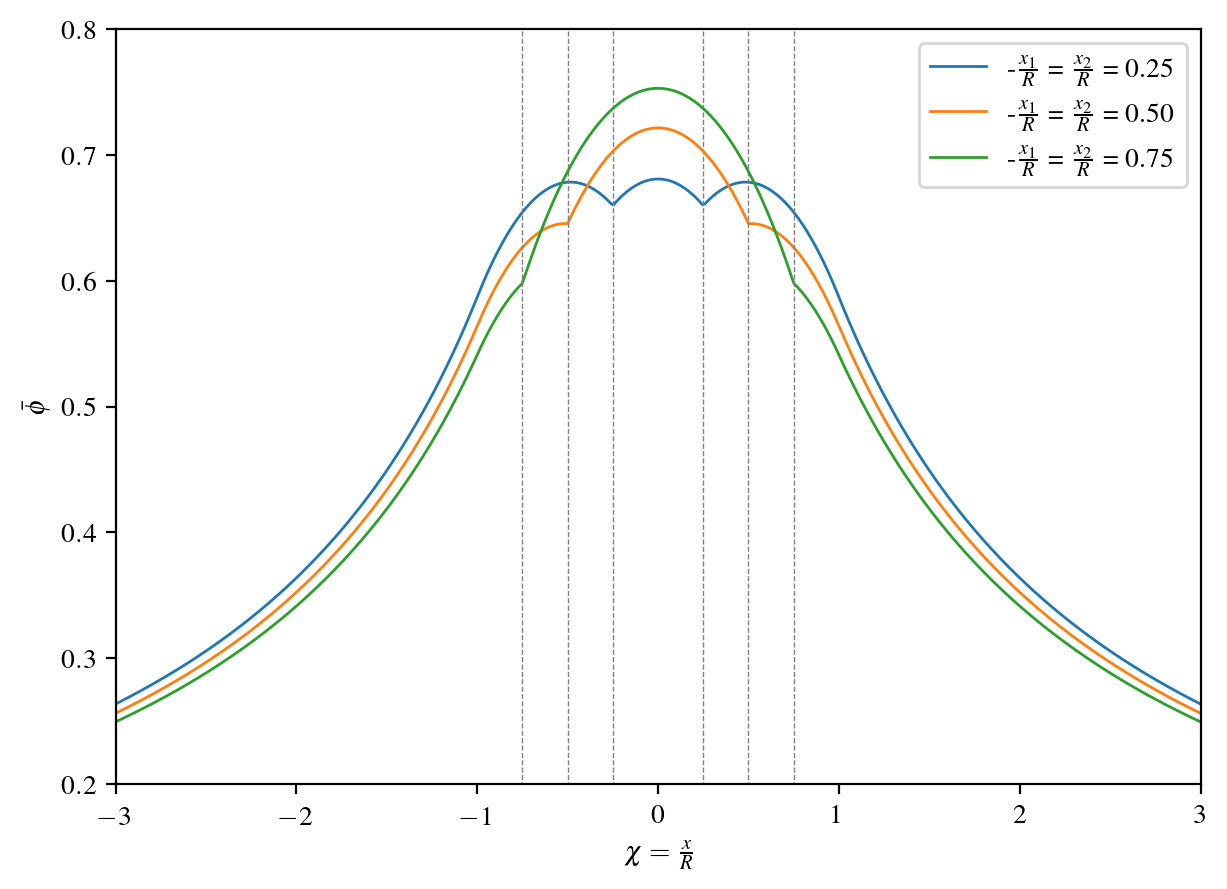

In [15]:
fig = figure(dpi=200,figsize=(7,5))
chi = linspace(-3,3,500)
chis = [.25,.5,0.75]
dat_waves,i = np.zeros((len(chi),len(chis))) ,0
for chi1 in chis:
    xi_chis_beta = [1,-chi1,chi1,0.25*sqrt(2)]
    Psi = eval_Psi(chi,xi_chis_beta)
    dat_waves[:,i] = Psi
    plot(chi,Psi,lw=1,label=r"-$\frac{x_1}{R}$ = $\frac{x_2}{R}$ = %2.2f" %chi1)
    plot(2*[xi_chis_beta[1]],[0,1],'--',lw=0.5,color="gray")
    plot(2*[xi_chis_beta[2]],[0,1],'--',lw=0.5,color="gray")
    i += 1
xlabel(r"$\chi=\frac{x}{R}$"),ylabel(r"$\bar \phi$")
xlim([-3,3]),ylim([0.2,.8]),legend()
#savefig("wave_2delta_b0-25.jpg",format="jpg",dpi=300,pad_inches=0,optimize=95)

datos = column_stack((chi,dat_waves))
savetxt("w2d_025.dat",datos)

show()